# House Price Prediction using Simple Linear Regression

In [1]:
#Import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data and create dataframe
data=pd.read_csv("kc_house_data.csv")
df=pd.DataFrame(data)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
#View first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Count shape
df.shape

(21613, 21)

In [5]:
#View the data mathematically
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#Get the data type and count value for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#Data cleaning
df.isnull().sum() #as there is no null value present data is cleaned

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# EDA

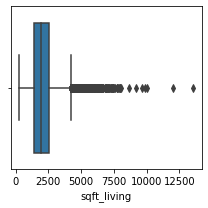

In [8]:
#Outlier Analysis
fig = plt.subplots(1, figsize=(3,3))
plot1 = sns.boxplot(df["sqft_living"])
plt.tight_layout()  #The tight_layout() function in pyplot module of matplotlib library is used to automatically adjust
#subplot parameters to give specified padding.

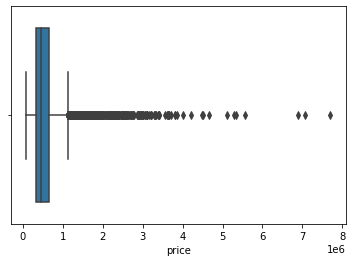

In [9]:
sns.boxplot(df["price"])
plt.show()

In [10]:
#Viewing outlier data
print(np.where(df["sqft_living"]>4000))
print(np.where(df["price"]>1.5e+6))

(array([    5,    41,    70,   115,   153,   185,   239,   269,   270,
         300,   313,   314,   381,   384,   419,   431,   436,   472,
         473,   484,   486,   509,   512,   518,   527,   532,   540,
         551,   556,   563,   577,   679,   691,   722,   729,   779,
         799,   814,   943,  1031,  1055,  1061,  1100,  1122,  1133,
        1164,  1171,  1199,  1211,  1217,  1261,  1272,  1294,  1315,
        1361,  1396,  1423,  1448,  1487,  1535,  1539,  1557,  1586,
        1622,  1676,  1730,  1732,  1754,  1770,  1803,  1807,  1848,
        1921,  1931,  1944,  1945,  1946,  2023,  2040,  2085,  2088,
        2112,  2113,  2125,  2200,  2236,  2254,  2267,  2298,  2321,
        2355,  2366,  2383,  2389,  2399,  2407,  2411,  2444,  2461,
        2578,  2582,  2620,  2626,  2634,  2668,  2713,  2772,  2846,
        2858,  2860,  2864,  2884,  2899,  2974,  3020,  3039,  3091,
        3100,  3121,  3126,  3152,  3204,  3231,  3237,  3271,  3338,
        3344,  3349

In [11]:
df.drop(np.where(df["sqft_living"]>4000)[0],inplace=True)
df.shape

(20830, 21)

In [17]:
df.drop(np.where(df["price"]>3e+6)[0],inplace=True)
df.shape

(20826, 21)

In [18]:
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df["sqft_living"]))
print(z)
a = np.abs(stats.zscore(df["price"]))
print(a)

[1.0739691  0.79770786 1.62604648 ... 1.28941393 0.50842642 1.28941393]
[1.03280741 0.12847791 1.18673925 ... 0.37078661 0.37850524 0.65403956]


In [19]:
# IQR for sqft_living
Q1 = np.percentile(df["sqft_living"], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df["sqft_living"], 75,interpolation = 'midpoint') 
IQR = Q3 - Q1 
# IQR for price
Q11 = np.percentile(df["price"], 25, interpolation = 'midpoint') 
Q33= np.percentile(df["price"], 75,interpolation = 'midpoint') 
IQR1 = Q33- Q11 

In [20]:
#sqft_living
# Above Upper bound
upper = df["sqft_living"]>= (Q3+1.5*IQR)
print("Upper bound:",upper)
print(np.where(upper))


Upper bound: 0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: sqft_living, Length: 20826, dtype: bool
(array([], dtype=int64),)


In [21]:
# Below Lower bound
lower = df["sqft_living"] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: sqft_living, Length: 20826, dtype: bool
(array([], dtype=int64),)


In [22]:
#price
# Above Upper bound
upper1 = df["price"]>= (Q33+1.5*IQR1)
print("Upper bound:",upper1)
print(np.where(upper1))
# Below Lower bound
lower1 = df["price"] <= (Q11-1.5*IQR1)
print("Lower bound:", lower1)
print(np.where(lower1))

Upper bound: 0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: price, Length: 20826, dtype: bool
(array([   20,    47,    67,    88,   100,   121,   210,   212,   239,
         273,   302,   380,   412,   433,   468,   482,   568,   606,
         623,   636,   701,   720,   754,   762,   782,   835,   845,
         895,   906,  1028,  1061,  1077,  1105,  1114,  1195,  1228,
        1272,  1299,  1317,  1359,  1362,  1374,  1381,  1385,  1411,
        1437,  1443,  1469,  1519,  1520,  1561,  1614,  1639,  1698,
        1744,  1745,  1762,  1765,  1808,  1820,  1859,  1908,  1965,
        1994,  2003,  2050,  2054,  2091,  2093,  2095,  2217,  2223,
        2229,  2247,  2273,  2330,  2346,  2349,  2355,  2365,  2372,
        2376,  2415,  2462,  2463,  2464,  2515,  2535,  2632,  2672,
        2681,  2685,  2709,  2727,  2736,  2782,  2805,  2841,  2893,
        291

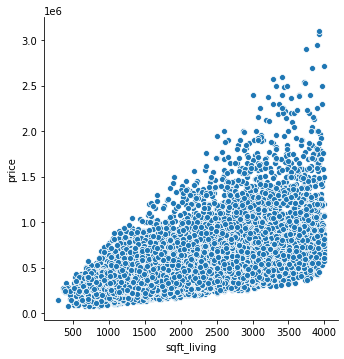

In [23]:
#Pairplot
sns.pairplot(df, x_vars="sqft_living", y_vars="price",height=5,aspect=1,kind='scatter')
plt.show()

In [24]:
#Correlation
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.000839,0.010761,0.025220,0.012393,-0.128008,0.027272,-0.002458,0.017513,-0.025296,0.030755,0.013649,-0.000888,0.027786,-0.017002,-0.011536,0.001458,0.026193,0.011031,-0.140983
price,0.000839,1.000000,0.268516,0.439249,0.612975,0.060887,0.245169,0.207291,0.349905,0.062134,0.626670,0.503767,0.251337,0.010439,0.134256,-0.012515,0.376070,0.001614,0.556548,0.050529
bedrooms,0.010761,0.268516,1.000000,0.483404,0.579915,0.009917,0.150066,-0.024793,0.039313,0.036538,0.312706,0.457156,0.271290,0.140443,0.014733,-0.143057,-0.019464,0.120834,0.358551,0.007008
bathrooms,0.025220,0.439249,0.483404,1.000000,0.712713,0.039226,0.498829,0.024585,0.121426,-0.120835,0.611610,0.627759,0.219808,0.517679,0.048125,-0.193314,0.009131,0.214597,0.513699,0.038883
sqft_living,0.012393,0.612975,0.579915,0.712713,1.000000,0.123759,0.339731,0.051596,0.205559,-0.047954,0.709295,0.842850,0.373819,0.323580,0.050103,-0.195131,0.035982,0.244883,0.731460,0.136962
sqft_lot,-0.128008,0.060887,0.009917,0.039226,0.123759,1.000000,-0.025660,0.024291,0.069295,-0.002097,0.069409,0.136773,-0.009687,0.036480,0.012000,-0.126667,-0.095072,0.213701,0.128711,0.706860
floors,0.027272,0.245169,0.150066,0.498829,0.339731,-0.025660,1.000000,0.011207,0.000477,-0.265972,0.451242,0.533804,-0.299503,0.491048,0.005435,-0.053017,0.043039,0.117017,0.253137,-0.033956
waterfront,-0.002458,0.207291,-0.024793,0.024585,0.051596,0.024291,0.011207,1.000000,0.384972,0.021683,0.046108,0.029739,0.042983,-0.037569,0.093202,0.038843,-0.023741,-0.049513,0.064328,0.034139
view,0.017513,0.349905,0.039313,0.121426,0.205559,0.069295,0.000477,0.384972,1.000000,0.050690,0.186478,0.090085,0.220186,-0.078599,0.101124,0.102018,-0.002125,-0.091442,0.236069,0.064578
condition,-0.025296,0.062134,0.036538,-0.120835,-0.047954,-0.002097,-0.265972,0.021683,0.050690,1.000000,-0.144306,-0.162768,0.192946,-0.354323,-0.060506,-0.006288,-0.015122,-0.098034,-0.087256,0.003481


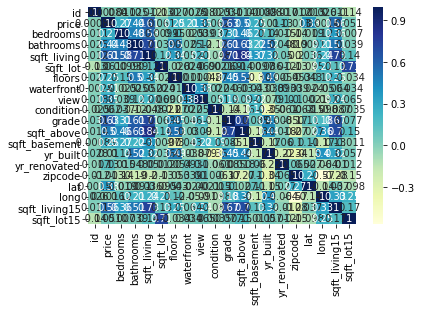

In [25]:
#Heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [26]:
#Building model 
x = np.array(df.sqft_living).reshape(-1, 1)
y = np.array(df.price)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=20)

In [27]:
import statsmodels.api as sm
#Add a constant to get intercept
xtrain_sm = sm.add_constant(xtrain)

#Fit the regression line using OLS
lr = sm.OLS(ytrain,xtrain_sm).fit()

In [28]:
lr.params

array([54395.96069237,   226.73374357])

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:34:42   Log-Likelihood:            -2.2827e+05
No. Observations:               16660   AIC:                         4.566e+05
Df Residuals:                   16658   BIC:                         4.566e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.44e+04   4757.570     11.434      0.0

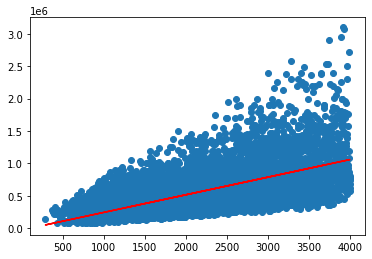

In [30]:
plt.scatter(xtrain, ytrain)
plt.plot(xtrain, -2.555e+04  + 271.3715*xtrain, 'r')
plt.show()

In [31]:
#Model Evaluation
ytrainpred = lr.predict(xtrain_sm)
res = (ytrain - ytrainpred)

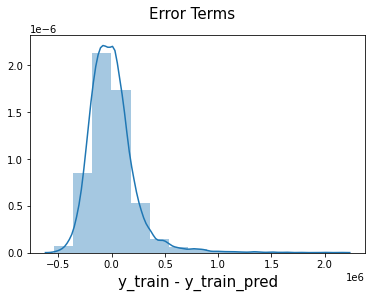

In [32]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                 
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()

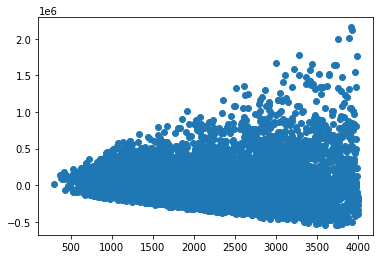

In [33]:
plt.scatter(xtrain,res)
plt.show()

In [34]:
#Predictions on the test set
# Add a constant to X_test
xtest_sm = sm.add_constant(xtest)

# Predict the y values corresponding to X_test_sm
ypred = lr.predict(xtest_sm)


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
#viewing RMSE
np.sqrt(mean_squared_error(ytest, ypred))

211367.77980340074

In [37]:
#Checking the r-squared on the test set
r_squared = r2_score(ytest, ypred)
r_squared

0.36124272558969006

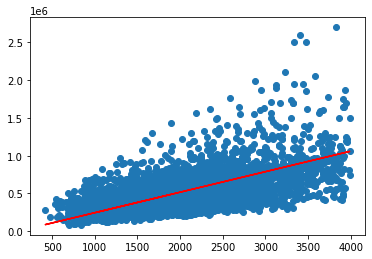

In [38]:
#Visualizing the fit on the test set
plt.scatter(xtest, ytest)
plt.plot(xtest, -2.555e+04  + 271.3715* xtest, 'r')
plt.show()

In [39]:
#viewing RMSE
np.sqrt(mean_squared_error(ytest, ypred))

211367.77980340074

In [40]:
#Checking the r-squared on the test set
r_squared = r2_score(ytest, ypred)
r_squared

0.36124272558969006